<a href="https://colab.research.google.com/github/Danieli4/Forecast/blob/master/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%B5%D1%82_%D1%81_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%D0%BC%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# multivariate output 1d cnn example
#import tf as tf
from numpy import array
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM, LeakyReLU
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt



In [ ]:
#Функция генерации
def generator_number(start, to, count_num, for_num, val_vount, val_num):
  data = np.random.randint(start,to,count_num).reshape(int(count_num/for_num),for_num)
  validat_x = data[-val_vount-val_num:-val_num]
  validat_y = data[-val_num:]
  return (data, validat_x,validat_y)

In [ ]:
#тест generator_number
print (generator_number(1,20,12000,4,100,1)[2])

[[12 11  4  4]]


In [ ]:
#f = open("/4-20.xlsx";"w",encoding="unicode")
data= pd.read_csv("/4-20.csv", sep = ';')
data
dataset_n = data[['1','2','3','4']]
print (data.columns)
validat_x = dataset_n[-101:-1]
validat_y = dataset_n[-1:]
validat_x
dataset = dataset_n[:2810].to_numpy()
dataset.shape
dataset_val = data[['1','2','3','4']][:2910].to_numpy()
dataset_val

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


array([[20,  2, 10,  4],
       [12,  6, 20, 17],
       [ 5, 19, 18, 17],
       ...,
       [ 8,  4,  9, 15],
       [ 5, 15, 17, 20],
       [10, 13, 11, 15]])

In [ ]:
#функция генератора последовательностей
def gen_time_ser (data, leght, batch):
  generator = TimeseriesGenerator(data, data, length=leght, batch_size=batch)
  return(generator)

In [ ]:
# тест генератора
data = generator_number(1,20,12000,4,100,10)[0]
generator = gen_time_ser(data, 100,10)
# for i in range(len(generator)):
#   x, y = generator[i]
#   print('%s => %s' % (x, y))
data.shape[1]

4

In [ ]:

#%%
n_input = 100
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=20)
print (generator)
# for i in range(len(generator)):
#   x, y = generator[i]
#   print('%s => %s' % (x, y))

In [ ]:
x_val = array([validat_x])
y_val = array( validat_y)
#print (x_val)
print (y_val)

[[15 12  1  8]]


In [ ]:
# the dataset knows the number of features, e.g. 2
#n_features = X.shape[2]
n_features = 4
# define model
model = Sequential()
model.add(Conv1D(filters=200, kernel_size=100, activation='relu', input_shape=(generator.length, data.shape[1])))
model.add(BatchNormalization())
#model.add(Conv1D(filters=64, kernel_size=45, activation='relu', input_shape=(395, 64)))
#model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(250))
#model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))

model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
#model.fit(X, y, epochs=3, verbose=1)
callbacks = [
  # Остановить обучение если `val_loss` перестанет улучшаться в течение 2 эпох
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Записать логи TensorBoard в каталог `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
history = model.fit(generator, epochs=300, verbose=2, validation_data=(generator))#, callbacks=callbacks)
print("Ok!")
# demonstrate prediction

#%%


Epoch 1/300
290/290 - 7s - loss: 35.9286 - val_loss: 30.6084
Epoch 2/300
290/290 - 5s - loss: 29.8526 - val_loss: 28.3532
Epoch 3/300


KeyboardInterrupt: ignored

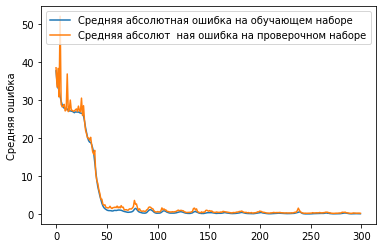

[[12.453272  11.760269   7.8563547  6.16746  ]]
dval [[15 12  1  8]]
[[ 2.54672813  0.23973083 -6.85635471  1.83254004]]


In [ ]:

plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолют  ная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

#%%

# x_input = array([[70,71,72,73,74,75], [76,77,78,79,80,81], [82,83,84,85,86,87]])
# x_input = x_input.reshape((1, 3, n_features))
x_input = array([dataset[-101:-1]])
yhat = model.predict(x_input, verbose=0)
print(yhat)
print("dval",y_val)
#print(x_input)
print(y_val-yhat)